# Лабораторная работа №8

# Построение пайплайна полиномиальной регрессии

## Подключение библиотек

In [164]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Загрузка данных и разделение на матрицу признаков и зависимую переменную

In [165]:
dataset = pd.read_csv('obesity.data.csv')
dataset.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
1,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
2,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
3,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
4,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight


In [166]:
X = dataset.iloc[:, 2:3].values
y = dataset.iloc[:, 3].values
print("Матрица признаков"); print(X[:5])
print("Зависимая переменная"); print(y[:5])

Матрица признаков
[[1.52]
 [1.8 ]
 [1.8 ]
 [1.78]
 [1.62]]
Зависимая переменная
[56.  77.  87.  89.8 53. ]


## Обработка пропущенных значений
нет пропущенных

## Обработка категориальных данных

### Замена категории кодом
не требуется

### Применение OneHotEncoder

In [167]:
# from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import OneHotEncoder
# labelencoder_X = LabelEncoder()
# X[:, 0] = labelencoder_X.fit_transform(X[:, 0])
# onehotencoder = OneHotEncoder()
# X = onehotencoder.fit_transform(X).toarray()
# print("Перекодировка категориального признака")
# print(X)

## Разделение выборки на тестовую и тренировочную

In [168]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 0) 

## Обучение модели

### Обучение линейной модели

In [169]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

### Обучение полиномиальной модели

In [170]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg1 = PolynomialFeatures(degree = 10)
poly_reg2 = PolynomialFeatures(degree = 15)
poly_reg3 = PolynomialFeatures(degree = 2)
poly_reg4 = PolynomialFeatures(degree = 3)
poly_reg5 = PolynomialFeatures(degree = 6)
X_poly = poly_reg1.fit_transform(X)
poly_reg1.fit(X_poly, y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

## Предсказание, обработка и визуализация результатов
Выбранный кейс для предикта:
- Female,21,1.62,64,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight

[75.97763126] [81.47271729]


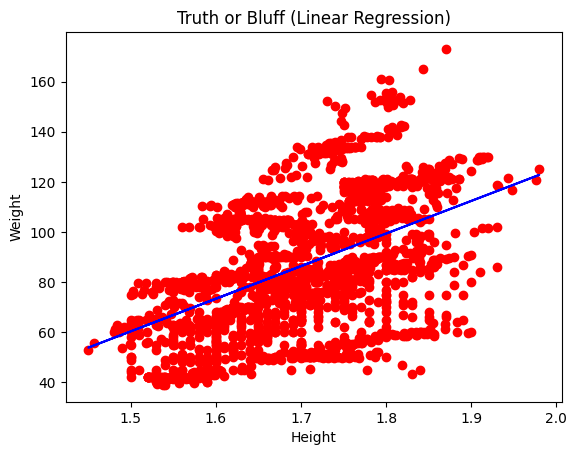

In [171]:
y_pred_lin = lin_reg.predict([[1.62]])
y_pred_poly = lin_reg_2.predict(poly_reg1.fit_transform([[1.62]]))
print(y_pred_lin, y_pred_poly)
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

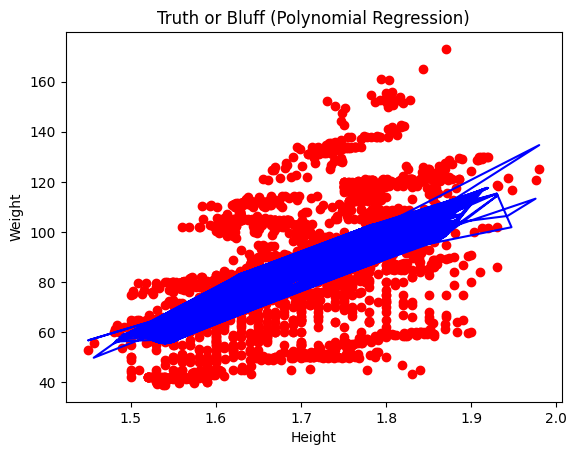

In [172]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg1.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

C:\Users\md\AppData\Local\Temp\ipykernel_26468\2696885982.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


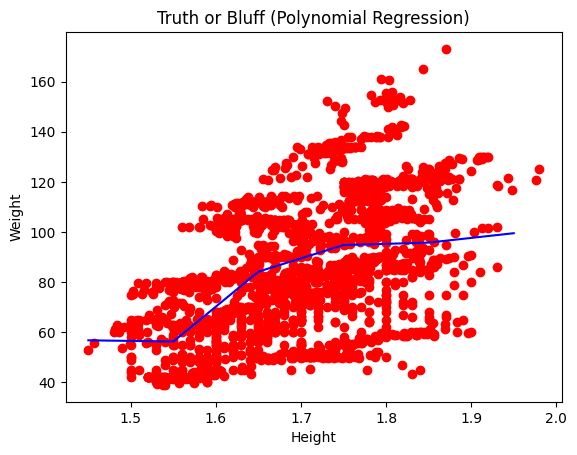

In [173]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg1.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

### Регрессия при n = 15

[75.97763126] [82.60456848]


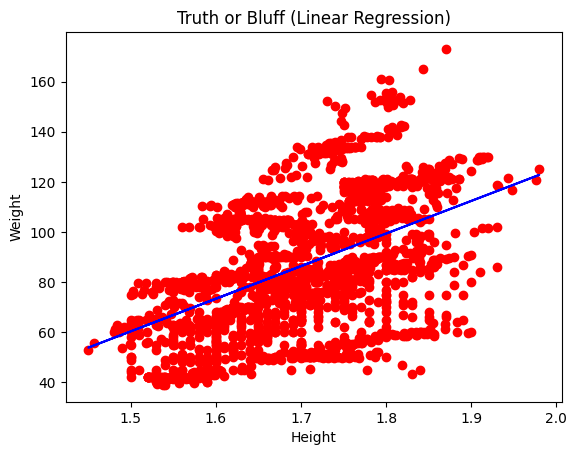

In [174]:
X_poly = poly_reg2.fit_transform(X)
poly_reg2.fit(X_poly, y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)
y_pred_lin = lin_reg.predict([[1.62]])
y_pred_poly = lin_reg_2.predict(poly_reg2.fit_transform([[1.62]]))
print(y_pred_lin, y_pred_poly)
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

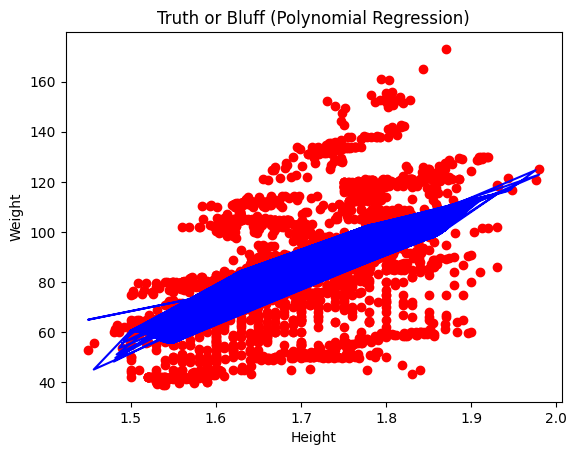

In [175]:
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg_2.predict(poly_reg2.fit_transform(X)), color='blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

C:\Users\md\AppData\Local\Temp\ipykernel_26468\3375166912.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


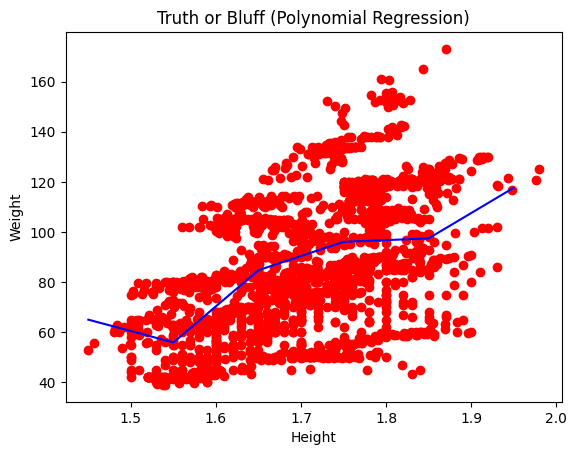

In [176]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color='red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg2.fit_transform(X_grid)), color='blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

### Регрессия при n = 2

[75.97763126] [76.40789464]


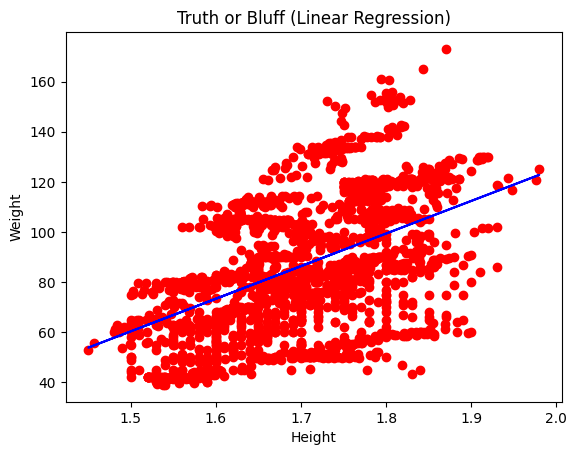

In [177]:
X_poly = poly_reg3.fit_transform(X)
poly_reg3.fit(X_poly, y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)
y_pred_lin = lin_reg.predict([[1.62]])
y_pred_poly = lin_reg_2.predict(poly_reg3.fit_transform([[1.62]]))
print(y_pred_lin, y_pred_poly)
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg.predict(X), color='blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

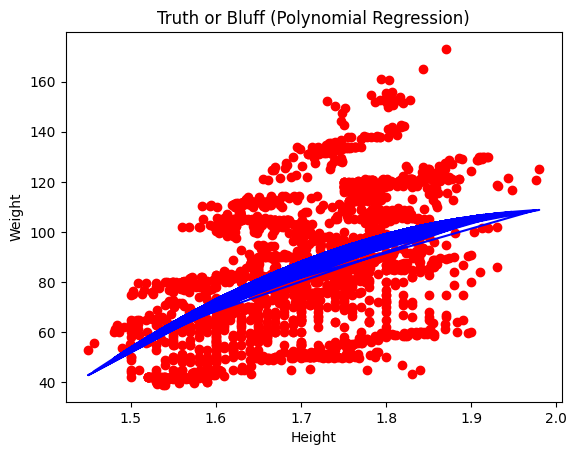

In [178]:
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg_2.predict(poly_reg3.fit_transform(X)), color='blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

C:\Users\md\AppData\Local\Temp\ipykernel_26468\2807503933.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


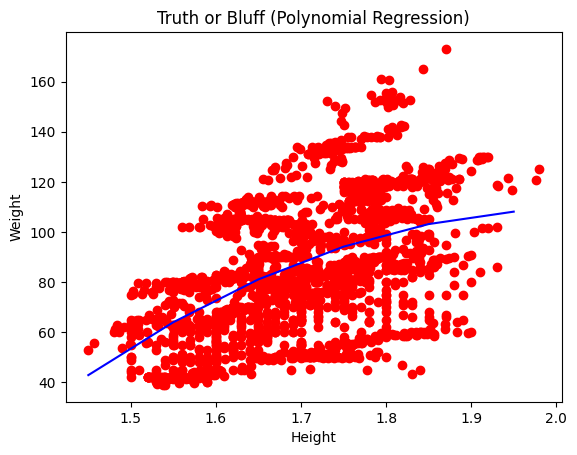

In [179]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color='red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg3.fit_transform(X_grid)), color='blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

### Регрессия при n = 3

[75.97763126] [76.72389462]


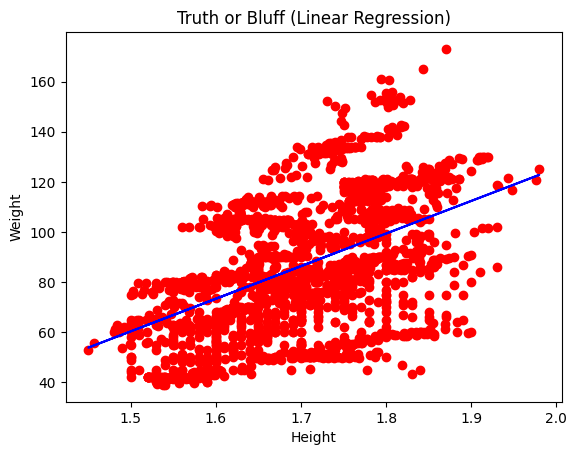

In [180]:
X_poly = poly_reg4.fit_transform(X)
poly_reg4.fit(X_poly, y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)
y_pred_lin = lin_reg.predict([[1.62]])
y_pred_poly = lin_reg_2.predict(poly_reg4.fit_transform([[1.62]]))
print(y_pred_lin, y_pred_poly)
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg.predict(X), color='blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

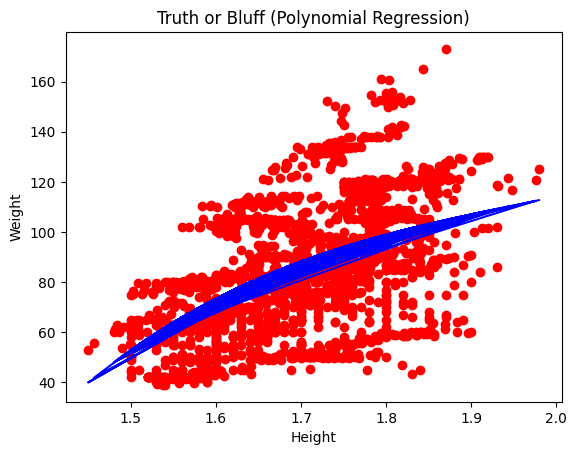

In [181]:
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg_2.predict(poly_reg4.fit_transform(X)), color='blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

C:\Users\md\AppData\Local\Temp\ipykernel_26468\1574715313.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


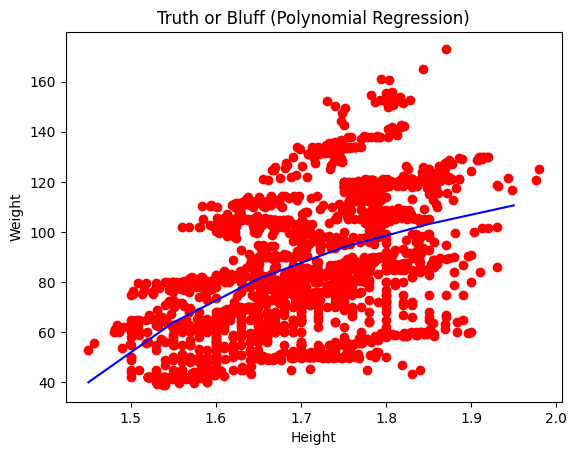

In [182]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color='red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg4.fit_transform(X_grid)), color='blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

### Регрессия при n = 6

[75.97763126] [77.91252183]


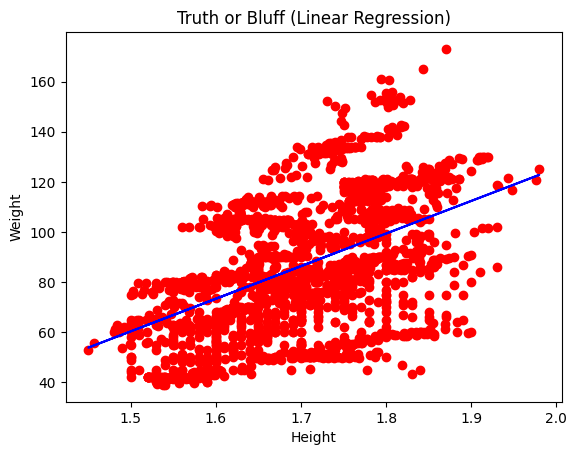

In [183]:
X_poly = poly_reg5.fit_transform(X)
poly_reg5.fit(X_poly, y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)
y_pred_lin = lin_reg.predict([[1.62]])
y_pred_poly = lin_reg_2.predict(poly_reg5.fit_transform([[1.62]]))
print(y_pred_lin, y_pred_poly)
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg.predict(X), color='blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

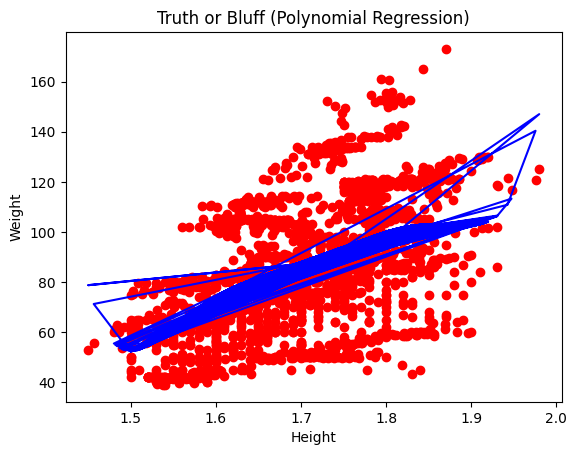

In [184]:
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg_2.predict(poly_reg5.fit_transform(X)), color='blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

C:\Users\md\AppData\Local\Temp\ipykernel_26468\1423477089.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


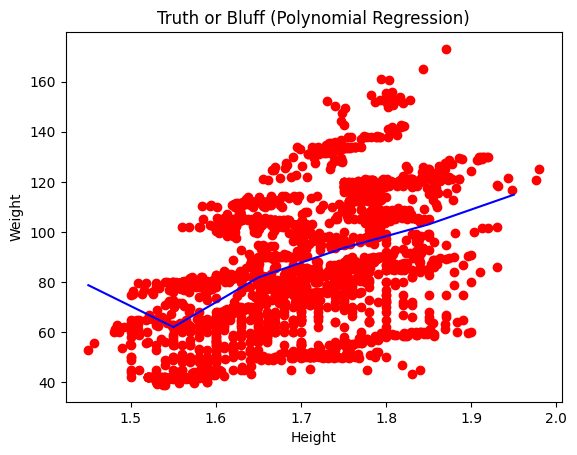

In [185]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color='red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg5.fit_transform(X_grid)), color='blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()